In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns


In [4]:
#This is a quick project showcasing my understanding and comfort with cleaning data and analyzing it (and visualizing data)
# through the use of Python libraries such as Numpy, Pandas, Matplotlib and Seaborn

#We brought in a dataset from the ESPN Site here: https://www.espncricinfo.com/records/highest-career-batting-average-282910
#showing the most dominant batters in cricket history

#All Activities are split by a keyword "TASK" which helps me showcase how I'd go about solving each situation

In [5]:
espn_data = pd.read_excel(r'ESPN Cricket.xlsx')


In [6]:
df = espn_data.copy()

In [7]:
df.head(4)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80.0,10.0,6996,334,99.94,9800+,58.60,29,13,7,626,6
1,HC Brook (ENG),2022-2023,12,20.0,1.0,1181,186,62.15,1287,91.76,4,7,1,141,23
2,AC Voges (AUS),2015-2016,20,31.0,7.0,1485,269*,61.87,2667,55.68,5,4,2,186,5
3,RG Pollock (SA),1963-1970,23,41.0,4.0,2256,274,60.97,1707+,54.48,7,11,1,246,11


# Data Cleaning

In [8]:
#TASK: Renaming columns (to help non-cricket fans understand the context)
df = df.rename(columns={'NO':'Not_Outs',
                        'HS':'Highest_Inn_Score',
                        'BF':'Balls_Faced',
                        'SR':'Batting_Strike_Rate',
                        '100':'Hundred_Scored',
                        '50':'Fifties_Scored',
                        '0s':'Ducks_Scored',
                       '4s':'Boundary_Fours',
                       '6s':'Boundary_Sixes',
                       'Span':'Years_Played',
                       'Mat':'Matches_Played',
                       'Inn':'Innings_Batted',
                       'Ave':'Batting_Average'})

In [9]:
df.head(1)

,Player,Years_Played,Matches_Played,Inns,Not_Outs,Runs,Highest_Inn_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Hundred_Scored,Fifties_Scored,0,Boundary_Fours,Boundary_Sixes
0,DG Bradman (AUS),1928-1948,52,80.0,10.0,6996,334,99.94,9800+,58.60,29,13,7,626,6


In [10]:
#TASK: Checking for null values
df.isnull().any() #determines if there are any null values in any series of df


Player                 False
Years_Played           False
Matches_Played         False
Inns                    True
Not_Outs                True
Runs                   False
Highest_Inn_Score      False
Batting_Average        False
Balls_Faced            False
Batting_Strike_Rate    False
Hundred_Scored         False
Fifties_Scored         False
0                      False
Boundary_Fours         False
Boundary_Sixes         False
dtype: bool

In [11]:
#TASK: resolving null values
#retrieving null values
df[df['Inns'].isna()==1] # (1 = True)
df[df['Not_Outs'].isna()==1]

#determining spread of null value columns (whether to use mean or median for null replacement)
df['Inns'].mean() #139
df['Inns'].median() #137... relatively close (no large outlier), can use mean

df['Not_Outs'].mean() #14
df['Not_Outs'].median() #12 

#replacing the nulls with mean of columns
df['Inns'].fillna(df['Inns'].mean(),inplace=True)
df['Not_Outs'].fillna(df['Not_Outs'].mean(),inplace=True)




In [12]:
df.isnull().any() #veryifying no nulls remain

Player                 False
Years_Played           False
Matches_Played         False
Inns                   False
Not_Outs               False
Runs                   False
Highest_Inn_Score      False
Batting_Average        False
Balls_Faced            False
Batting_Strike_Rate    False
Hundred_Scored         False
Fifties_Scored         False
0                      False
Boundary_Fours         False
Boundary_Sixes         False
dtype: bool

In [13]:
#TASK: Finding Duplicates
df.duplicated() #high level test to see if any records are duplicated
df[df['Player'].duplicated()==True] #finds and presents which record of Player is duplicated (only shows duplicate entry)

#can also use method below to show all records including the original and duplicated
df[df['Player'].isin(['KC Sangakkara (SL)'])]

#drops duplicates
df.drop_duplicates(inplace=True)



In [14]:
df[df['Player'].duplicated()==True] #verifying no duplicates remain

,Player,Years_Played,Matches_Played,Inns,Not_Outs,Runs,Highest_Inn_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Hundred_Scored,Fifties_Scored,0,Boundary_Fours,Boundary_Sixes


In [15]:
#TASK: splitting a Years_Played column into Start Year, End Year 
#Creating function to split columns in two
def time_played(time):
    start_date,end_date=time.split('-')
    Start_Year = int(start_date[:4])
    End_Year = int(end_date[:4])
    return Start_Year,End_Year

#create new column names
new_columns = ['Start_Year','End_Year']    

In [16]:
#input data for new columns
new_column_data = df['Years_Played'].apply(lambda x: pd.Series(time_played(x)))

In [17]:
#creating a new column by iterating through range of new columns variable
for i in range(len(new_columns)):
    df.insert(loc=df.columns.get_loc('Years_Played')+1+i,column=new_columns[i],value=new_column_data[i])
    
#alternate way:
'''
df['Start_Year'] = df['Years_Played'].str.split(pat='-'),str[0] #grabs first index after splitting column by "-" pattern
#which would lead to lists like [2015, 2040] allowing us to grab each element by index str[0] is start year and [1] is end

Note: only issue with above code is the new columns will be added to end of the df instead of right after the original column as 
we did above
'''

'\ndf[\'Start_Year\'] = df[\'Years_Played\'].str.split(pat=\'-\'),str[0] #grabs first index after splitting column by "-" pattern\n#which would lead to lists like [2015, 2040] allowing us to grab each element by index str[0] is start year and [1] is end\n\nNote: only issue with above code is the new columns will be added to end of the df instead of right after the original column as \nwe did above\n'

In [18]:
df.head(3) #verifying our new columns are made

,Player,Years_Played,Start_Year,End_Year,Matches_Played,Inns,Not_Outs,Runs,Highest_Inn_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Hundred_Scored,Fifties_Scored,0,Boundary_Fours,Boundary_Sixes
0,DG Bradman (AUS),1928-1948,1928,1948,52,80.0,10.0,6996,334,99.94,9800+,58.60,29,13,7,626,6
1,HC Brook (ENG),2022-2023,2022,2023,12,20.0,1.0,1181,186,62.15,1287,91.76,4,7,1,141,23
2,AC Voges (AUS),2015-2016,2015,2016,20,31.0,7.0,1485,269*,61.87,2667,55.68,5,4,2,186,5


In [19]:
#removing original Years_Played column
df.drop(['Years_Played'],axis=1, inplace=True) #axis 1 indicates we want column dropped

In [20]:
df.head(3) #verifying drop

,Player,Start_Year,End_Year,Matches_Played,Inns,Not_Outs,Runs,Highest_Inn_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Hundred_Scored,Fifties_Scored,0,Boundary_Fours,Boundary_Sixes
0,DG Bradman (AUS),1928,1948,52,80.0,10.0,6996,334,99.94,9800+,58.60,29,13,7,626,6
1,HC Brook (ENG),2022,2023,12,20.0,1.0,1181,186,62.15,1287,91.76,4,7,1,141,23
2,AC Voges (AUS),2015,2016,20,31.0,7.0,1485,269*,61.87,2667,55.68,5,4,2,186,5


In [21]:
#TASK: Splitting the countries from the Player Column into their own columns
df['Country']=df['Player'].str.split(pat='(').str[1]

In [22]:
df.head(1) #verifying the country column is made

,Player,Start_Year,End_Year,Matches_Played,Inns,Not_Outs,Runs,Highest_Inn_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Hundred_Scored,Fifties_Scored,0,Boundary_Fours,Boundary_Sixes,Country
0,DG Bradman (AUS),1928,1948,52,80.0,10.0,6996,334,99.94,9800+,58.60,29,13,7,626,6,AUS)


In [23]:
df['Country']=df['Country'].str.replace(')','') #removing excess ) from each record

In [24]:
df.head(1) #verifying results and now looking to remove country from Player column

,Player,Start_Year,End_Year,Matches_Played,Inns,Not_Outs,Runs,Highest_Inn_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Hundred_Scored,Fifties_Scored,0,Boundary_Fours,Boundary_Sixes,Country
0,DG Bradman (AUS),1928,1948,52,80.0,10.0,6996,334,99.94,9800+,58.60,29,13,7,626,6,AUS


In [25]:
df['Player']=df['Player'].str.split(pat='(').str[0] #removed country from Player column
#doing this first would lead to problems trying to make country column using player column as country codes are gone

In [26]:
df.head(5)

,Player,Start_Year,End_Year,Matches_Played,Inns,Not_Outs,Runs,Highest_Inn_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Hundred_Scored,Fifties_Scored,0,Boundary_Fours,Boundary_Sixes,Country
0,DG Bradman,1928,1948,52,80.0,10.0,6996,334,99.94,9800+,58.60,29,13,7,626,6,AUS
1,HC Brook,2022,2023,12,20.0,1.0,1181,186,62.15,1287,91.76,4,7,1,141,23,ENG
2,AC Voges,2015,2016,20,31.0,7.0,1485,269*,61.87,2667,55.68,5,4,2,186,5,AUS
3,RG Pollock,1963,1970,23,41.0,4.0,2256,274,60.97,1707+,54.48,7,11,1,246,11,SA
4,GA Headley,1930,1954,22,40.0,4.0,2190,270*,60.83,416+,56.00,10,5,2,104,1,WI


In [27]:
#Task: Verify correct Datatypes per Column and Change if Needed
df.dtypes

Player                  object
Start_Year               int64
End_Year                 int64
Matches_Played          object
Inns                   float64
Not_Outs               float64
Runs                     int64
Highest_Inn_Score       object
Batting_Average        float64
Balls_Faced             object
Batting_Strike_Rate     object
Hundred_Scored           int64
Fifties_Scored           int64
0                        int64
Boundary_Fours           int64
Boundary_Sixes           int64
Country                 object
dtype: object

In [28]:
#determining why columns that otherwise have numbers are listed as objects
df['Matches_Played'].unique() #we see special characters like *
df['Matches_Played'] = df['Matches_Played'].str.replace('*','')

df['Highest_Inn_Score'].unique() #same issue
df['Highest_Inn_Score'] = df['Highest_Inn_Score'].str.replace('*','')

df['Batting_Strike_Rate'].unique() #we spot a special character as - which is to be a null
df['Batting_Strike_Rate'] = df['Batting_Strike_Rate'].replace('-',np.nan)

df['Balls_Faced'].unique() #unique character + plus missing value
df['Balls_Faced'] =  df['Balls_Faced'].str.replace('+','')

In [29]:
df['Balls_Faced'] = df['Balls_Faced'].replace('-',np.nan)
df['Balls_Faced'].unique() 

array(['9800', '1287', '2667', '1707', '416', '6558', '1288', '4957', nan,
       '7491', '17977', '4063', '22882', '5363', '2844', '28903', '178',
       '16052', '665', '1823', '13079', '108', '29437', '2644', '19753',
       '15164', '31258', '14372', '19375', '22782', '2035', '10636',
       '12436', '27395', '14184', '22461', '7614', '14349', '16077',
       '27002', '9613', '2731', '22959', '20189', '16345', '488', '619',
       '10441', '2445', '15924', '15456', '885', '158', '11641', '1799',
       '8662', '15525', '3118', '3217', '2110'], dtype=object)

In [30]:
#converting column datatypes where they need to be fixed
df['Matches_Played'] = df['Matches_Played'].astype(int)
df['Highest_Inn_Score'] = df['Highest_Inn_Score'].astype(int)
df['Batting_Strike_Rate'] = df['Batting_Strike_Rate'].astype(float)
df['Balls_Faced'] = df['Balls_Faced'].astype(float)

'''
Alternate way to do this:
df = df.astype({'Start_Year':'int','End_Year':'int'...})
'''

"\nQuicker way/alternate way to do this:\ndf = df.astype({'Start_Year':'int','End_Year':'int'...})\n"

In [31]:
df.dtypes

Player                  object
Start_Year               int64
End_Year                 int64
Matches_Played           int32
Inns                   float64
Not_Outs               float64
Runs                     int64
Highest_Inn_Score        int32
Batting_Average        float64
Balls_Faced            float64
Batting_Strike_Rate    float64
Hundred_Scored           int64
Fifties_Scored           int64
0                        int64
Boundary_Fours           int64
Boundary_Sixes           int64
Country                 object
dtype: object

In [32]:
df.head(2)

,Player,Start_Year,End_Year,Matches_Played,Inns,Not_Outs,Runs,Highest_Inn_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Hundred_Scored,Fifties_Scored,0,Boundary_Fours,Boundary_Sixes,Country
0,DG Bradman,1928,1948,52,80.0,10.0,6996,334,99.94,9800.0,58.60,29,13,7,626,6,AUS
1,HC Brook,2022,2023,12,20.0,1.0,1181,186,62.15,1287.0,91.76,4,7,1,141,23,ENG


In [33]:
#getting rid of new nan values
df['Highest_Inn_Score']=df['Highest_Inn_Score'].fillna(df['Highest_Inn_Score'].mean())
df['Batting_Strike_Rate']=df['Batting_Strike_Rate'].fillna(df['Batting_Strike_Rate'].mean())
df['Balls_Faced']=df['Balls_Faced'].fillna(df['Balls_Faced'].mean())

In [34]:
df.isnull().any()

Player                 False
Start_Year             False
End_Year               False
Matches_Played         False
Inns                   False
Not_Outs               False
Runs                   False
Highest_Inn_Score      False
Batting_Average        False
Balls_Faced            False
Batting_Strike_Rate    False
Hundred_Scored         False
Fifties_Scored         False
0                      False
Boundary_Fours         False
Boundary_Sixes         False
Country                False
dtype: bool

In [35]:
df['Balls_Faced']=df['Balls_Faced'].astype(int)

In [36]:
#TASK: Create Career Length Column
Years_Played= df['End_Year']-df['Start_Year']
#df.pop('Years_Played') #removes column if already placed in df 

df.insert(df.columns.get_loc('End_Year')+1,'Years_Played',Years_Played) #placing new column after End Year
df.head(3)
    
#Completed data cleaning can move into data analysis    


,Player,Start_Year,End_Year,Years_Played,Matches_Played,Inns,Not_Outs,Runs,Highest_Inn_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Hundred_Scored,Fifties_Scored,0,Boundary_Fours,Boundary_Sixes,Country
0,DG Bradman,1928,1948,20,52,80.0,10.0,6996,334,99.94,9800,58.60,29,13,7,626,6,AUS
1,HC Brook,2022,2023,1,12,20.0,1.0,1181,186,62.15,1287,91.76,4,7,1,141,23,ENG
2,AC Voges,2015,2016,1,20,31.0,7.0,1485,269,61.87,2667,55.68,5,4,2,186,5,AUS


In [37]:
#quick rename of column for further cleaning
df = df.rename(columns={'0':'0s'})
df.head()

,Player,Start_Year,End_Year,Years_Played,Matches_Played,Inns,Not_Outs,Runs,Highest_Inn_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Hundred_Scored,Fifties_Scored,0s,Boundary_Fours,Boundary_Sixes,Country
0,DG Bradman,1928,1948,20,52,80.0,10.0,6996,334,99.94,9800,58.60,29,13,7,626,6,AUS
1,HC Brook,2022,2023,1,12,20.0,1.0,1181,186,62.15,1287,91.76,4,7,1,141,23,ENG
2,AC Voges,2015,2016,1,20,31.0,7.0,1485,269,61.87,2667,55.68,5,4,2,186,5,AUS
3,RG Pollock,1963,1970,7,23,41.0,4.0,2256,274,60.97,1707,54.48,7,11,1,246,11,SA
4,GA Headley,1930,1954,24,22,40.0,4.0,2190,270,60.83,416,56.00,10,5,2,104,1,WI


## Data Analysis (Descriptive Stats) 

In [38]:
#TASK: Quick Data Overview
df.columns

Index(['Player', 'Start_Year', 'End_Year', 'Years_Played', 'Matches_Played',
       'Inns', 'Not_Outs', 'Runs', 'Highest_Inn_Score', 'Batting_Average',
       'Balls_Faced', 'Batting_Strike_Rate', 'Hundred_Scored',
       'Fifties_Scored', '0s', 'Boundary_Fours', 'Boundary_Sixes', 'Country'],
      dtype='object')

In [39]:
df.shape #62 rows, 18 columns

(62, 18)

In [40]:
df.size #number of records in total db

1116

In [41]:
df.info() #shows non-null and datatypes of each series

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 0 to 62
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player               62 non-null     object 
 1   Start_Year           62 non-null     int64  
 2   End_Year             62 non-null     int64  
 3   Years_Played         62 non-null     int64  
 4   Matches_Played       62 non-null     int32  
 5   Inns                 62 non-null     float64
 6   Not_Outs             62 non-null     float64
 7   Runs                 62 non-null     int64  
 8   Highest_Inn_Score    62 non-null     int32  
 9   Batting_Average      62 non-null     float64
 10  Balls_Faced          62 non-null     int32  
 11  Batting_Strike_Rate  62 non-null     float64
 12  Hundred_Scored       62 non-null     int64  
 13  Fifties_Scored       62 non-null     int64  
 14  0s                   62 non-null     int64  
 15  Boundary_Fours       62 non-null     int64  
 1

In [42]:
#checking for outliers and summary stats
df.describe()


,Start_Year,End_Year,Years_Played,Matches_Played,Inns,Not_Outs,Runs,Highest_Inn_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Hundred_Scored,Fifties_Scored,0s,Boundary_Fours,Boundary_Sixes
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,1971.016129,1984.177419,13.161290,80.080645,137.549428,13.984391,6419.758065,249.177419,53.681129,10566.209677,49.932881,19.306452,28.596774,7.806452,652.435484,27.306452
std,34.838029,33.857718,5.610861,50.819287,85.183269,11.120050,4012.932012,61.501572,7.195703,8829.343449,11.288337,12.318969,18.626140,5.536285,522.424161,27.147797
min,1893.000000,1905.000000,1.000000,12.000000,20.000000,1.000000,990.000000,122.000000,48.000000,108.000000,25.590000,1.000000,3.000000,1.000000,37.000000,0.000000
25%,1937.000000,1955.500000,10.000000,30.250000,62.000000,5.250000,2379.000000,205.500000,49.510000,2494.750000,43.447500,7.250000,11.500000,3.000000,145.000000,5.250000
50%,1977.000000,1993.500000,14.000000,79.000000,137.000000,12.000000,6520.500000,245.000000,51.735000,10120.500000,50.031441,19.500000,28.500000,7.000000,567.000000,20.500000
75%,2000.000000,2013.750000,17.000000,117.750000,196.250000,18.750000,8844.000000,277.750000,56.345000,16020.000000,55.397500,29.000000,42.500000,12.000000,1054.250000,42.000000
max,2022.000000,2024.000000,24.000000,200.000000,329.000000,49.000000,15921.000000,400.000000,99.940000,31258.000000,91.760000,51.000000,68.000000,22.000000,2058.000000,97.000000


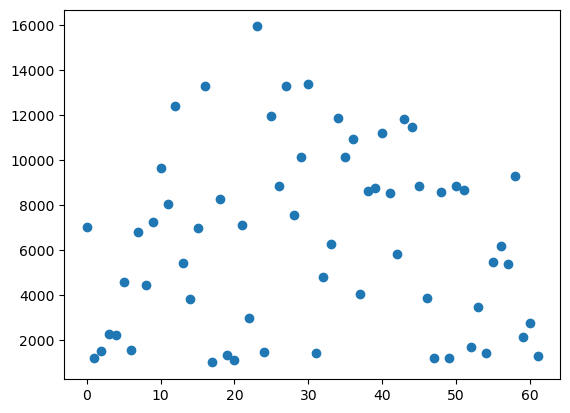

In [43]:
#Identifying outliers using scatterplot
plt.scatter(range(len(df['Runs'])),df['Runs'])


{'whiskers': [<matplotlib.lines.Line2D at 0x2806530ac90>,
 'caps': [<matplotlib.lines.Line2D at 0x28065cf2b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x28066559dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x28066570050>],
 'fliers': [<matplotlib.lines.Line2D at 0x28066570a90>],
 'means': []}

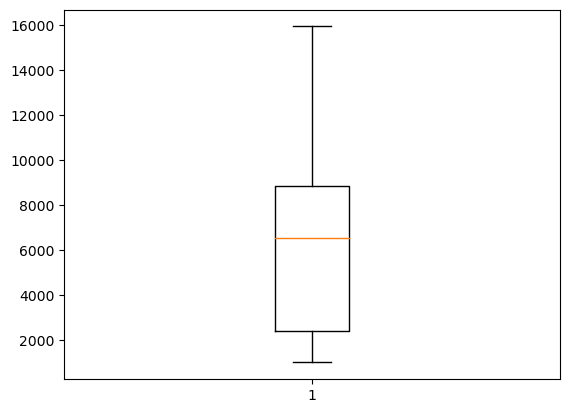

In [44]:
#Using boxplot
plt.boxplot(df['Runs'])

(array([16., 13., 11., 11.,  3.,  2.,  2.,  0.,  2.,  2.]),
 array([ 1. ,  5.8, 10.6, 15.4, 20.2, 25. , 29.8, 34.6, 39.4, 44.2, 49. ]),
 <BarContainer object of 10 artists>)

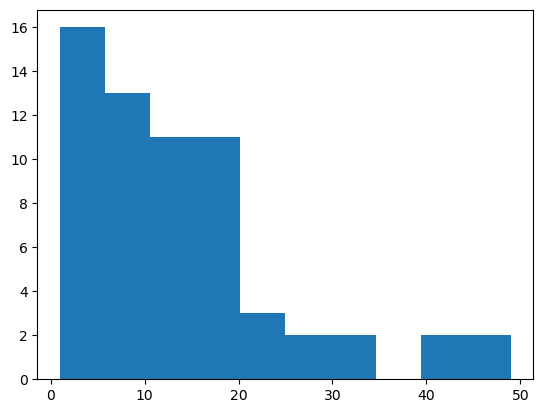

In [45]:
#Using Histogram 
plt.hist(df['Not_Outs']) #we see data is right skewed here with most data in left hand

In [46]:
pd.set_option('display.max_rows',None) #shows us all rows
zscore(df['Not_Outs']) #identifying Z scores above 2 and below -2

0    -0.361232
1    -1.177188
2    -0.633217
3    -0.905203
4    -0.905203
5    -0.451894
6    -0.814541
7     0.092077
8    -0.814541
9     0.182739
10    0.998695
11    0.636048
12    0.273400
14   -0.633217
15   -0.633217
16    0.092077
17    2.358621
18   -1.086526
19    0.182739
20   -0.814541
21   -1.177188
22    0.454724
23   -0.633217
24    1.723989
25   -0.905203
26   -0.723879
27    0.004340
28    1.633327
29   -0.179908
30    0.454724
31    1.361342
32   -0.814541
33    0.454724
34    0.182739
35    3.174577
36    0.182739
37    2.902592
38   -0.633217
39    0.001415
40    0.364062
41    2.721268
42   -0.179908
43    0.092077
44    0.092077
45    0.545386
46    0.726709
47   -0.451894
48   -1.086526
49   -0.723879
50   -1.086526
51   -0.270570
52    0.726709
53   -0.814541
54   -0.451894
55   -0.905203
56    0.545386
57   -0.361232
58    0.001415
59   -0.089247
60   -0.905203
61   -0.814541
62   -0.723879
Name: Not_Outs, dtype: float64

In [47]:
#Using Z Scores above 2 or below -2 to find outliers
df.loc[35] #locating outlier based on locations of above query

Player                 S Chanderpaul 
Start_Year                       1994
End_Year                         2015
Years_Played                       21
Matches_Played                    164
Inns                            280.0
Not_Outs                         49.0
Runs                            11867
Highest_Inn_Score                 203
Batting_Average                 51.37
Balls_Faced                     27395
Batting_Strike_Rate             43.31
Hundred_Scored                     30
Fifties_Scored                     66
0s                                 15
Boundary_Fours                   1285
Boundary_Sixes                     36
Country                            WI
Name: 35, dtype: object

In [48]:
#Deciding to keep outliers as with domain knowledge and consideration of players stats they outliers are not too
#far from rest of data and not too wide to influence data

## Data Discovery

In [49]:
#Answering Questions:

In [50]:
#TASK: What is the average career length of Cricketers?
avg_career = df['Years_Played'].mean()
#13 years

In [51]:
#TASK: Average Batting Strike Rate for Cricketers Who Played 10+ Years?
df[df['Years_Played']>=10]['Batting_Strike_Rate'].mean()
#50 

49.992524341868005

In [52]:
#Task: Number of Cricketers Who Played Before 1960
df[df['End_Year']<1960]['Player'].count()
#18 players
df[df['End_Year']<1960][['Player','Start_Year','End_Year']].sort_values('End_Year') #shows list of those players

,Player,Start_Year,End_Year
55,Hon.FS Jackson,1893,1905
48,CP Mead,1911,1928
18,GE Tyldesley,1921,1929
32,J Ryder,1920,1929
14,JB Hobbs,1908,1930
60,WH Ponsford,1924,1934
62,DR Jardine,1928,1934
5,H Sutcliffe,1924,1935
61,SJ McCabe,1930,1938
6,E Paynter,1931,1939


In [53]:
#Task: Find Max Highest Inn Scores by Country
df['Country'].unique() #verifying no errors in entry exist, we notice icc has the same countries
df[df['Country'].isin(['ICC/PAK','PAK'])] 
#Note: we will be leaving ICC teams as is due to them potentially having players
#from outside of Pakistan as that is normal in ICC rules, we will be considering stats from the countries themselves as
#standalone

df.groupby('Country')['Highest_Inn_Score'].max()
#By default it will sort by the original index attached to each country, to sort by order of number we create a frame
df.groupby('Country')['Highest_Inn_Score'].max().to_frame('HighestInnPerCountry').reset_index().sort_values('HighestInnPerCountry',ascending=False)

,Country,HighestInnPerCountry
5,ICC/WI,400
0,AUS,380
10,SL,374
11,WI,365
1,ENG,364
3,ICC/PAK,329
2,ICC/IND,319
8,PAK,313
9,SA,278
4,ICC/SA,277


In [54]:
#TASK: Grab Average of 100s,50s and ducks (0s) by Country:
df.groupby('Country')[['Hundred_Scored','Fifties_Scored','0s']].mean()

,Hundred_Scored,Fifties_Scored,0s
Country,,,
AUS,20.625000,28.312500,8.500000
ENG,12.307692,20.769231,4.307692
ICC/IND,29.500000,47.500000,12.000000
ICC/PAK,25.000000,46.000000,15.000000
ICC/SA,36.000000,48.000000,13.500000
ICC/WI,34.000000,48.000000,17.000000
IND,29.500000,36.500000,10.750000
NZ,17.000000,21.000000,5.500000
PAK,21.250000,28.000000,9.500000


## Exploratory Analysis

### Task 1: Analyzing distribution of batting averages vs strike rates

count    62.000000
mean     53.681129
std       7.195703
min      48.000000
25%      49.510000
50%      51.735000
75%      56.345000
max      99.940000
Name: Batting_Average, dtype: float64


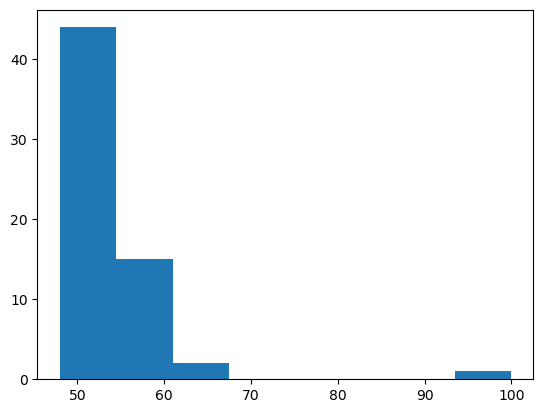

In [55]:
#Task 1: Analyzing distribution of batting averages vs strike rates
plt.hist(df['Batting_Average'],bins=8)
print(df['Batting_Average'].describe())

In [56]:
# Batting Average is right skewed, there seems to be a large outlier indicating a much stronger than average performance

In [57]:
#looking into outlier
df[df['Batting_Average']>90]
#Historical Context: DG Bradman had a verified Test Batting Average of 99.94 which is considered one of the sports
#greatest accomplishments (thus not a data entry error or typo) and was consistently a legendary player

,Player,Start_Year,End_Year,Years_Played,Matches_Played,Inns,Not_Outs,Runs,Highest_Inn_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Hundred_Scored,Fifties_Scored,0s,Boundary_Fours,Boundary_Sixes,Country
0,DG Bradman,1928,1948,20,52,80.0,10.0,6996,334,99.94,9800,58.6,29,13,7,626,6,AUS


count    62.000000
mean     49.932881
std      11.288337
min      25.590000
25%      43.447500
50%      50.031441
75%      55.397500
max      91.760000
Name: Batting_Strike_Rate, dtype: float64


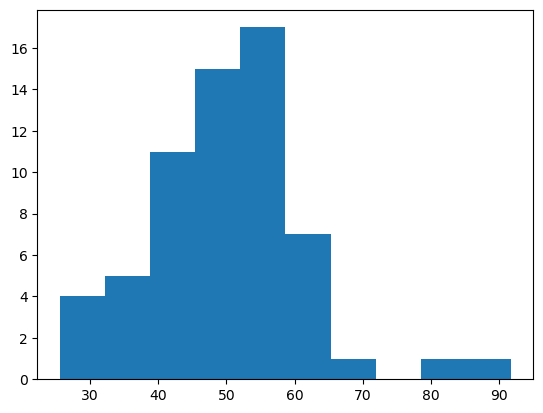

In [58]:
plt.hist(df['Batting_Strike_Rate'])
print(df['Batting_Strike_Rate'].describe())

In [59]:
#Batting strike rate follows a more normal distribution, though it also has a few outliers indicating stronger performances
#by some athletes

In [60]:
df[df['Batting_Strike_Rate']>75]
#Both HC Brook and V Sehwag are widely regarded for their batting rates, Sehwag being held as one of the most dominant batters

,Player,Start_Year,End_Year,Years_Played,Matches_Played,Inns,Not_Outs,Runs,Highest_Inn_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Hundred_Scored,Fifties_Scored,0s,Boundary_Fours,Boundary_Sixes,Country
1,HC Brook,2022,2023,1,12,20.0,1.0,1181,186,62.15,1287,91.76,4,7,1,141,23,ENG
49,V Sehwag,2001,2013,12,104,180.0,6.0,8586,319,49.34,10441,82.23,23,32,16,1233,91,ICC/IND


Text(80, 99, 'Correlation Coefficient: 0.16')

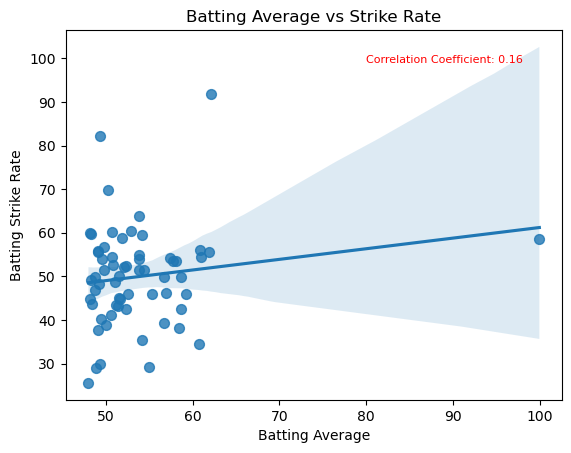

In [61]:
sns.regplot(x='Batting_Average', y='Batting_Strike_Rate', data=df, scatter_kws={'s': 50})
plt.xlabel('Batting Average')
plt.ylabel('Batting Strike Rate')
plt.title('Batting Average vs Strike Rate')
correlation = df['Batting_Average'].corr(df['Batting_Strike_Rate'])
plt.text(80, 99, f'Correlation Coefficient: {correlation:.2f}', fontsize=8, color='red')

In [62]:
#We see most players are clustered in one area indicating that on average players will bat between 50-65 and have a strike
#rate just below 65, there are outliers indicating some players are much stronger on their strike rate than batting average
# and vice versa but that is not the norm

#We also spot a low positive correlation between these attributes indicating the relationship and predictability between
#these two variables is not very high, batting average is not a strong indicator of batting strike rate and vice versa

### Exploratory Task 2: Assessing relation between Years Played and Runs and 0s scored

(array([ 4.,  5.,  6., 12., 11., 14.,  7.,  3.]),
 array([ 1.   ,  3.875,  6.75 ,  9.625, 12.5  , 15.375, 18.25 , 21.125,
        24.   ]),
 <BarContainer object of 8 artists>)

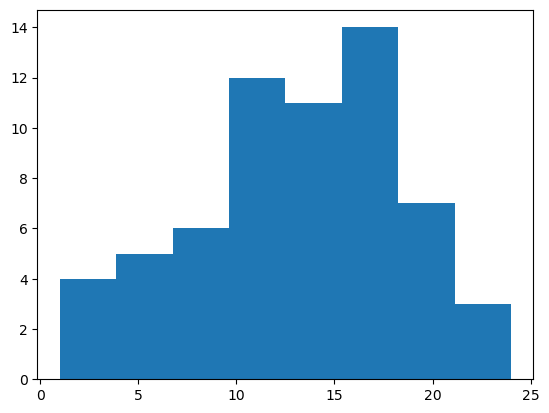

In [63]:
#Exploratory Task 2: Assessing relation between Years Played and Runs and 0s scored

#Distribution of Years Played
#plt.boxplot(df['Years_Played'])

plt.hist(df['Years_Played'],bins=8) #most players tend to fall between 10-18 years of career length

{'whiskers': [<matplotlib.lines.Line2D at 0x28066b2d410>,
 'caps': [<matplotlib.lines.Line2D at 0x28066b2e990>,
 'boxes': [<matplotlib.lines.Line2D at 0x28065dce3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x28066b2fed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28065dcc9d0>],
 'means': []}

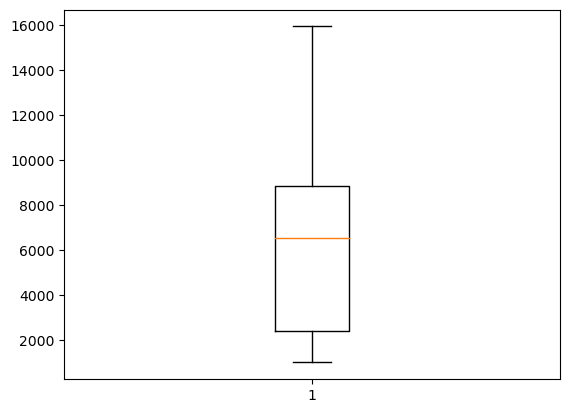

In [64]:
#plotting distribution of Runs and 0s
plt.boxplot(df['Runs'])
#no outliers exist showing datas spread and variability falls inside the boxplots central range
#this helps establish consistency within our Run column as no data falls beyond the expected range (1.5*IQR)

#It is noticeable that the data within the box skews towards the lower side of runs, there seems to be a wide range
# of data below the median (values below ~6000 runs) which are pulling the box down and skewing it

{'whiskers': [<matplotlib.lines.Line2D at 0x28066b97710>,
 'caps': [<matplotlib.lines.Line2D at 0x28066ba0f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x28066b96bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x28066ba24d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28066ba2ed0>],
 'means': []}

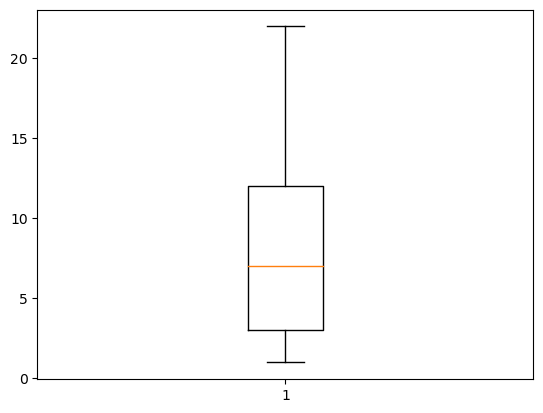

In [65]:
#Distribution of 0s
plt.boxplot(df['0s'])
#No outliers as well, data seems to skew towards the higher end (more 0s) indicating there is are players with larger
#0s (ducks) scored showing some level of variability in the data with regards to the number of 0s scored

Text(17, 20, 'Correlation Coefficient: 0.49')

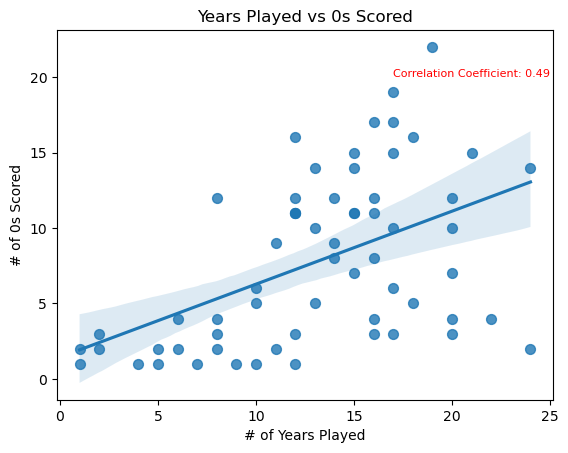

In [66]:
#Determining relationships between Years Played and 0s/Runs Scored
sns.regplot(x='Years_Played', y='0s', data=df, scatter_kws={'s': 50})
plt.xlabel('# of Years Played')
plt.ylabel('# of 0s Scored')
plt.title('Years Played vs 0s Scored')
correlation = df['Years_Played'].corr(df['0s'])
plt.text(17, 20, f'Correlation Coefficient: {correlation:.2f}', fontsize=8, color='red')

#we see here a relatively stronger positive correlation (0.49) exists betweeen # of Years Played and # of 0s Scored
#but it is not strong enough to indicate a direct relationship, there are many players with lots of experience and
#minimal 0s which takes away from the idea that more years played leads to more likelihood of scoring 0s

Text(17, 20, 'Correlation Coefficient: 0.61')

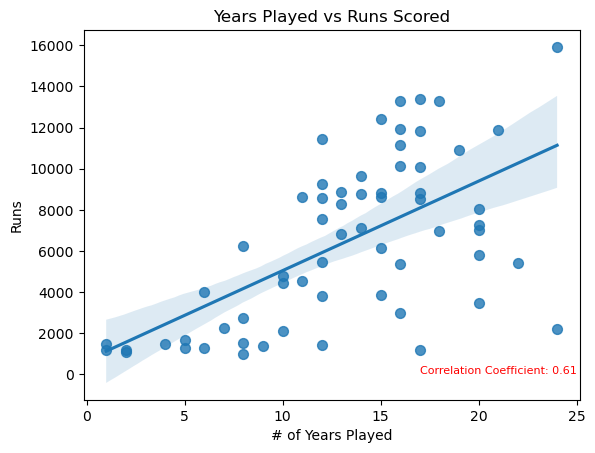

In [67]:
#Relationship between Years Played and Runs Scored
sns.regplot(x='Years_Played', y='Runs', data=df, scatter_kws={'s': 50})
plt.xlabel('# of Years Played')
plt.ylabel('Runs')
plt.title('Years Played vs Runs Scored')
correlation = df['Years_Played'].corr(df['Runs'])
plt.text(17, 20, f'Correlation Coefficient: {correlation:.2f}', fontsize=8, color='red')

#we see a stronger positive correlation here (0.61) indicating there is a relation between number of years played
#and the amount of runs scored (the more years you play the higher your run score) though there are anamolies
#and outliers which go against this, the most apparent one is GA Headley who played 24 years and scored only
#2190 runs, the main cause of this was that his career took place from 1930-1954 leading him to join WW2 from 1939-1948

In [68]:
df[df['Years_Played']>22] #searching for the outlier in GA Headley

,Player,Start_Year,End_Year,Years_Played,Matches_Played,Inns,Not_Outs,Runs,Highest_Inn_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Hundred_Scored,Fifties_Scored,0s,Boundary_Fours,Boundary_Sixes,Country
4,GA Headley,1930,1954,24,22,40.0,4.0,2190,270,60.83,416,56.00,10,5,2,104,1,WI
24,SR Tendulkar,1989,2013,24,200,329.0,33.0,15921,248,53.78,29437,54.04,51,68,14,2058,69,IND


### Exploratory Task 3: Number of Matches vs Highest Inn Scored (is there a relation?)

(array([16.,  6.,  5.,  9.,  5.,  9.,  4.,  2.,  5.,  1.]),
 array([ 12. ,  30.8,  49.6,  68.4,  87.2, 106. , 124.8, 143.6, 162.4,
        181.2, 200. ]),
 <BarContainer object of 10 artists>)

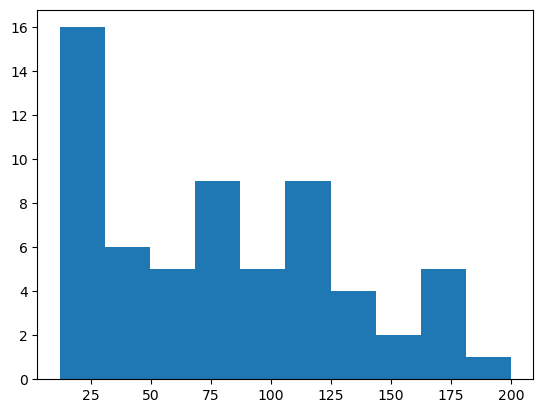

In [69]:
plt.hist(df['Matches_Played'])

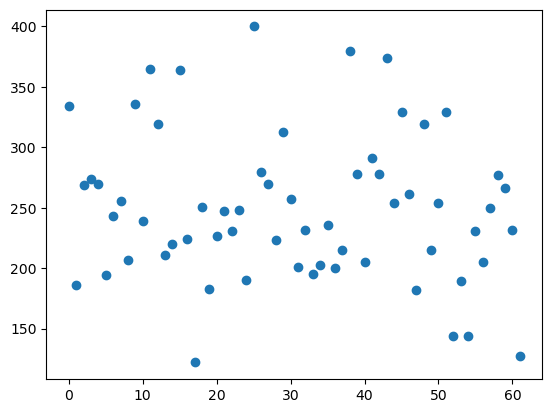

In [70]:
#looking at distribution of highest inn scores


plt.scatter(range(len(df['Highest_Inn_Score'])),df['Highest_Inn_Score']) 

Text(0.5, 1.0, 'Heatmap: Matches Played vs Highest Inn Score')

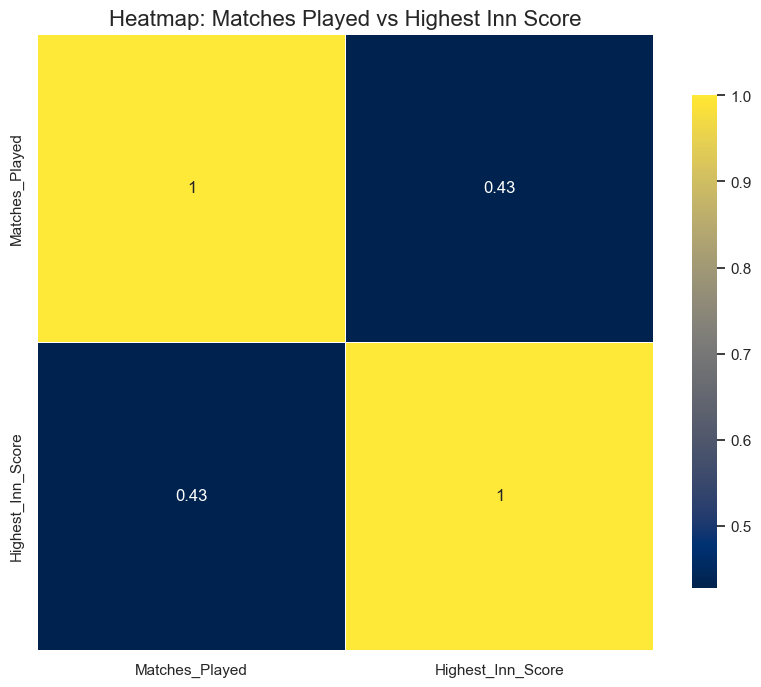

In [71]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,8))
heatmap_data = df[['Matches_Played','Highest_Inn_Score']]
heatmap = sns.heatmap(heatmap_data.corr(),
                      annot=True,
                      cmap='cividis',
                      linewidth=0.5,
                      square=True,
                     cbar_kws={'shrink': 0.8})
plt.title('Heatmap: Matches Played vs Highest Inn Score', fontsize=16)

# we see there is a moderate positive correlation (0.43) between matches played and highest inn score showing there is a 
#bit of a relation between the two but it is not strong enough to be the sole indicator as seen in heatmap below.